In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.chdir("C:\\code\\activ")

In [3]:
df = pd.read_excel('./documents/nov_nine_var.xlsx')

In [4]:
pop = df.iloc[:,22:23].to_numpy()
pop.shape

(395, 1)

In [5]:
def make_dataset(training_data, t=3, h=0, test_size=0.2):
    
    X_train = []
    y_train = []
    for i in range(t, len(training_data)-h):
        X_train.append(training_data[i-t:i])
        y_train.append(training_data[i+h])
        
    X = np.array(X_train)
    y = np.array(y_train)
    
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
    real = X

    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    return X_train,X_test,y_train,y_test, real

X_train,X_test,y_train,y_test, real = make_dataset(pop, t=6, h=0, test_size=0.2)

In [6]:
X_train.shape

(311, 6, 1)

In [7]:
real.shape

(389, 6, 1)

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=128, activation='tanh', input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(tf.keras.layers.LSTM(units=128, activation='tanh', return_sequences=True))
model.add(tf.keras.layers.LSTM(units=128, activation='tanh', return_sequences=False))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))
model.compile(loss='mse', optimizer='RMSprop')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 6, 128)            131584    
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 329,857
Trainable params: 329,857
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(X_train, y_train, epochs=5000, batch_size=64, validation_data=(X_test, y_test), verbose=1, 
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1000, verbose=1)])

Epoch 1/5000
5/5 [==============================] - 6s 287ms/step - loss: 1624.8474 - val_loss: 1104.6049
Epoch 2/5000
5/5 [==============================] - 0s 28ms/step - loss: 827.4717 - val_loss: 802.5783
Epoch 3/5000
5/5 [==============================] - 0s 29ms/step - loss: 661.6752 - val_loss: 747.3577
Epoch 4/5000
5/5 [==============================] - 0s 28ms/step - loss: 612.5173 - val_loss: 705.8045
Epoch 5/5000
5/5 [==============================] - 0s 33ms/step - loss: 575.1127 - val_loss: 669.3043
Epoch 6/5000
5/5 [==============================] - 0s 29ms/step - loss: 542.3190 - val_loss: 635.6411
Epoch 7/5000
5/5 [==============================] - 0s 28ms/step - loss: 512.1337 - val_loss: 603.8719
Epoch 8/5000
5/5 [==============================] - 0s 28ms/step - loss: 483.7220 - val_loss: 573.4966
Epoch 9/5000
5/5 [==============================] - 0s 28ms/step - loss: 456.6541 - val_loss: 544.3101
Epoch 10/5000
5/5 [==============================] - 0s 28ms/step - lo

In [10]:
plot_data = model.predict(real)

13/13 [==============================] - 1s 6ms/step


In [11]:
a = np.array([36, 36, 36, 36, 36, 36])
plot_data = np.append(a, plot_data)

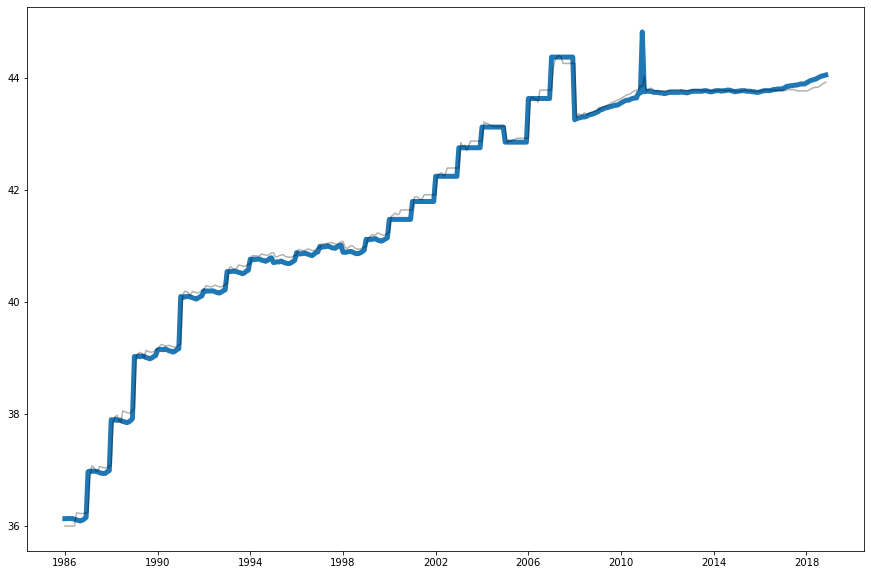

In [19]:
plt.figure(figsize=(15, 10))
plt.plot(pop, linewidth=5)
plt.plot(plot_data, c='k', alpha=0.3)

plt.xticks([0, 48, 96, 144, 192, 240, 288, 336, 384], labels=[1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018])
plt.savefig('./documents/fig/lstm_fig.jpg')

plt.show()

In [15]:
model.save('./model/lstm.h5')

In [16]:
np.save('./documents/result/lstm_pred.npy', plot_data)